In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install -q keras

In [7]:
import keras

In [6]:
path = "/content/drive/MyDrive/US_Accidents_Dec21_updated.csv"
data = pd.read_csv("/content/drive/MyDrive/US_Accidents_Dec21_updated.csv")

In [7]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
data.sample(15)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
572800,A-572801,2,2021-12-29 10:45:00,2021-12-29 12:04:30,30.692069,-88.028397,30.684082,-88.042632,1.010,Slow traffic on I-10 W - George C Wallace Tunl...,...,False,False,False,False,False,False,Day,Day,Day,Day
448452,A-448453,2,2021-12-14 20:07:42,2021-12-15 00:15:00,33.034481,-87.342871,33.034289,-87.340643,0.130,Incident on US-82 EB near MM 69 Drive with cau...,...,False,False,False,False,False,False,Night,Night,Night,Night
114601,A-114602,2,2016-11-06 11:02:47,2016-11-06 17:02:47,47.852910,-122.256280,47.844030,-122.259280,0.629,At 164th St/Exit 183 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
534281,A-534282,2,2021-06-02 20:26:00,2021-06-02 22:13:04,40.398305,-77.977749,40.383735,-77.996339,1.404,Incident on PA-829 SB near SMITH RD Drive with...,...,False,False,False,False,False,False,Day,Day,Day,Day
1948369,A-1948370,2,2020-11-11 10:32:00,2020-11-11 11:50:53,26.498326,-81.853258,26.498020,-81.853974,0.049,Incident on MIAMI ST near S TAMIAMI TRL Drive ...,...,False,False,False,False,False,False,Day,Day,Day,Day
243411,A-243412,2,2021-12-18 13:35:00,2021-12-18 16:04:21,32.983950,-117.254451,32.990290,-117.255581,0.443,Accident on Via de la Valle (I-5) from Lomas S...,...,False,False,False,False,False,False,Day,Day,Day,Day
894987,A-894988,2,2021-07-09 08:29:07,2021-07-09 10:06:48,41.841738,-87.985230,41.844370,-87.964915,1.061,Incident on I-88 EB near MIDWEST RD Expect lon...,...,False,False,False,False,False,False,Day,Day,Day,Day
2369095,A-2369096,2,2019-12-27 19:24:00,2019-12-27 19:56:29,32.660031,-117.108111,32.660031,-117.108111,0.000,At Mile of Cars Way/Exit 10 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
799840,A-799841,2,2021-09-28 21:56:00,2021-09-28 23:15:20,38.413045,-120.654882,38.413140,-120.655375,0.027,Incident on CA-88 NB near PINE GROVE VOLCANO R...,...,False,False,False,False,False,False,Night,Night,Night,Night
250502,A-250503,2,2021-12-21 17:21:00,2021-12-21 19:42:53,34.039628,-118.590318,34.040077,-118.578382,0.684,Slow traffic on CA-1 from Las Flores Canyon Rd...,...,False,False,False,False,False,False,Night,Night,Day,Day


In [10]:
data.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [12]:
data.head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
data.isnull().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [11]:
#print('The DataFrame has {} rows and {} columns'.format(data.shape[0],data.shape[1]))
#print('\n')
missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([missing,percent_missing], axis=1, keys=['Total', 'Percent'],sort=False)
missing_data[missing_data['Total']>=1]

,Total,Percent
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


In [12]:
liist = ['Humidity(%)','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','Visibility(mi)']
for l in liist:
    data[l] = data[l].fillna(0)

In [13]:
liist = ['Temperature(F)','Pressure(in)']
for l in liist:
    data[l]=data[l].fillna(data[l].mean())

In [14]:
missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([missing,percent_missing,data[missing.index].dtypes], axis=1, keys=['Total', 'Percent','Data Types'],sort=False)
missing_data[missing_data['Total']>=1]

,Total,Percent,Data Types
Number,1743911,61.290031,float64
Wind_Direction,73775,2.592834,object
Weather_Condition,70636,2.482514,object
Weather_Timestamp,50736,1.783125,object
Airport_Code,9549,0.335601,object
Timezone,3659,0.128596,object
Astronomical_Twilight,2867,0.100761,object
Nautical_Twilight,2867,0.100761,object
Civil_Twilight,2867,0.100761,object
Sunrise_Sunset,2867,0.100761,object


In [15]:
missing_copy = missing_data[missing_data['Total']>=1].copy()

In [16]:
object_columns = missing_copy[missing_copy['Data Types']=='object'].index
data[object_columns].head()

,Wind_Direction,Weather_Condition,Weather_Timestamp,Airport_Code,Timezone,Astronomical_Twilight,Nautical_Twilight,Civil_Twilight,Sunrise_Sunset,Zipcode,City,Street
0,SW,Light Rain,2016-02-08 00:53:00,KOSU,US/Eastern,Night,Night,Night,Night,43017,Dublin,Outerbelt E
1,Calm,Light Rain,2016-02-08 05:58:00,KFFO,US/Eastern,Night,Night,Night,Night,45424,Dayton,I-70 E
2,Calm,Overcast,2016-02-08 05:53:00,KLUK,US/Eastern,Day,Night,Night,Night,45203,Cincinnati,I-75 S
3,Calm,Overcast,2016-02-08 06:54:00,KAKR,US/Eastern,Day,Day,Night,Night,44311,Akron,I-77 N
4,WSW,Light Rain,2016-02-08 07:53:00,KLUK,US/Eastern,Day,Day,Day,Day,45217,Cincinnati,I-75 S


In [17]:
data['City'] = data.groupby('State')['City'].transform(lambda grp: grp.fillna(grp.value_counts().index[0]))

In [18]:
data['Start_Time'] = pd.to_datetime(data['Start_Time']) 
data['End_Time'] = pd.to_datetime(data['End_Time']) 
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp']) 

In [19]:
def filler(data,columns):
    # get list comprising column missing data
    liist = data[data[columns].isna()].index
    for i in liist:
      #condition to get Day or Night as a result
        if 6<= data.loc[i,'Start_Time'].hour and data.loc[i,'Start_Time'].hour <18:
            data[columns] = data[columns].fillna('Day')
        else:
            data[columns] = data[columns].fillna('Night')

filler(data,'Nautical_Twilight')

In [20]:
data.Nautical_Twilight.value_counts()

Day      2066339
Night     779003
Name: Nautical_Twilight, dtype: int64

In [21]:
data['Timezone'] = data.groupby('State')['Timezone'].transform(lambda tz: tz.fillna(tz.value_counts().index[0]))

In [22]:
missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([missing,percent_missing,data[missing.index].dtypes], axis=1, keys=['Total', 'Percent','Data Types'],sort=False)
missing_data[missing_data['Total']>=1]

,Total,Percent,Data Types
Number,1743911,61.290031,float64
Wind_Direction,73775,2.592834,object
Weather_Condition,70636,2.482514,object
Weather_Timestamp,50736,1.783125,datetime64[ns]
Airport_Code,9549,0.335601,object
Astronomical_Twilight,2867,0.100761,object
Civil_Twilight,2867,0.100761,object
Sunrise_Sunset,2867,0.100761,object
Zipcode,1319,0.046356,object
Street,2,0.000070,object


In [23]:
data['Zipcode'] = data.groupby('State')['Zipcode'].transform(lambda zc: zc.fillna(zc.value_counts().index[0]))
data['Airport_Code'] = data.groupby('State')['Airport_Code'].transform(lambda ac: ac.fillna(ac.value_counts().index[0]))

In [24]:
data.Description = data.Description.fillna('Accident')

In [25]:
data.drop(labels=['End_Lat', 'End_Lng'],axis=1,inplace=True)

In [26]:
missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([missing,percent_missing,data[missing.index].dtypes], axis=1, keys=['Total', 'Percent','Data Types'],sort=False)
missing_data[missing_data['Total']>=1]

,Total,Percent,Data Types
Number,1743911,61.290031,float64
Wind_Direction,73775,2.592834,object
Weather_Condition,70636,2.482514,object
Weather_Timestamp,50736,1.783125,datetime64[ns]
Astronomical_Twilight,2867,0.100761,object
Civil_Twilight,2867,0.100761,object
Sunrise_Sunset,2867,0.100761,object
Street,2,0.000070,object


In [27]:
data.to_pickle('data_cleaned.pkl')

In [25]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,NaN,Pomona Fwy E,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [29]:
data = pd.read_pickle('data_cleaned.pkl')

In [30]:
# create new features for timeseries analysis.
data['Hour'] = data['Start_Time'].dt.hour
data['Day'] = data['Start_Time'].dt.day
data['Day_Name'] = data['Start_Time'].dt.day_name()
data['Week'] = data['Start_Time'].dt.week
data['Month'] = data['Start_Time'].dt.month
data['Count'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [31]:
data.groupby('Month')['Count'].value_counts()

Month  Count
1      1        198365
2      1        194995
3      1        158224
4      1        171880
5      1        181944
6      1        226561
7      1        159111
8      1        178670
9      1        241822
10     1        299131
11     1        360696
12     1        473943
Name: Count, dtype: int64

Text(0.5, 1.0, 'Accidents over the Months')

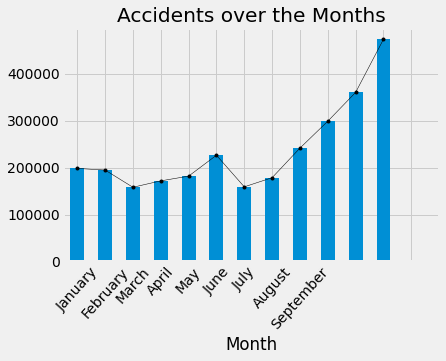

In [43]:
import calendar
import numpy as np
data.groupby('Month')['Count'].value_counts().plot(kind='bar')
data.groupby('Month')['Count'].value_counts().plot(color='k',linestyle='-',marker='.',linewidth=0.5)
plt.xticks(np.arange(14),calendar.month_name[1:10],rotation=48)
plt.xlabel('Month')
plt.title('Accidents over the Months')

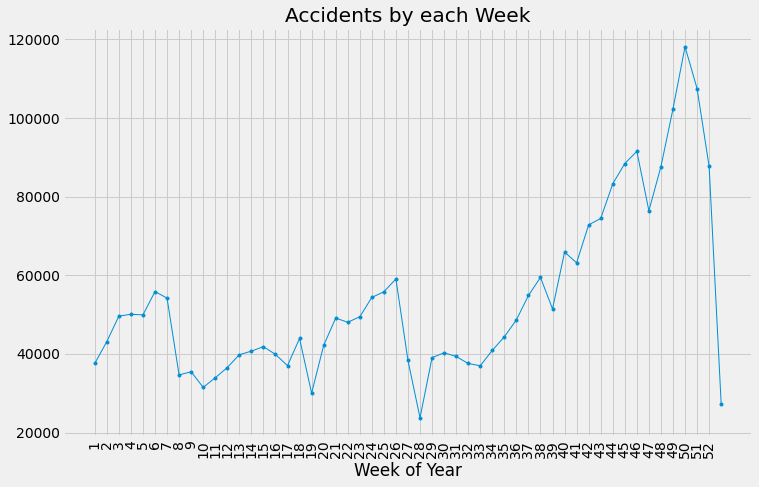

In [41]:
plt.figure(figsize=(11,7))
data.groupby('Week')['Count'].value_counts().plot(linewidth=1,marker='.')
plt.xticks(np.arange(52),np.arange(1,53),rotation = 90)
plt.xlabel('Week of Year')
plt.title('Accidents by each Week')
plt.show()

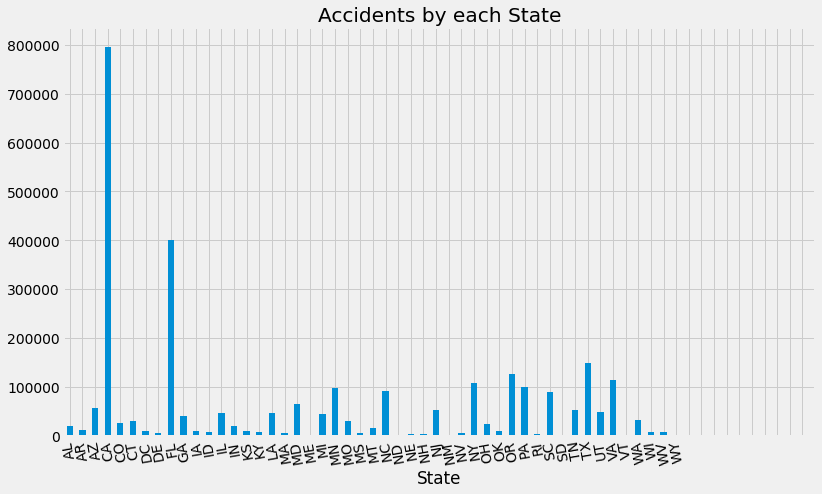

In [44]:
plt.figure(figsize=(12,7))
data.groupby('State')['Count'].value_counts().plot(kind='bar')
plt.xticks(np.arange(60),sorted(data['State'].unique()),rotation = 100)
plt.xlabel('State')
plt.title('Accidents by each State')
plt.show()

In [45]:
cat_var = pd.crosstab(columns=data['Severity'],
    index=data['State'])

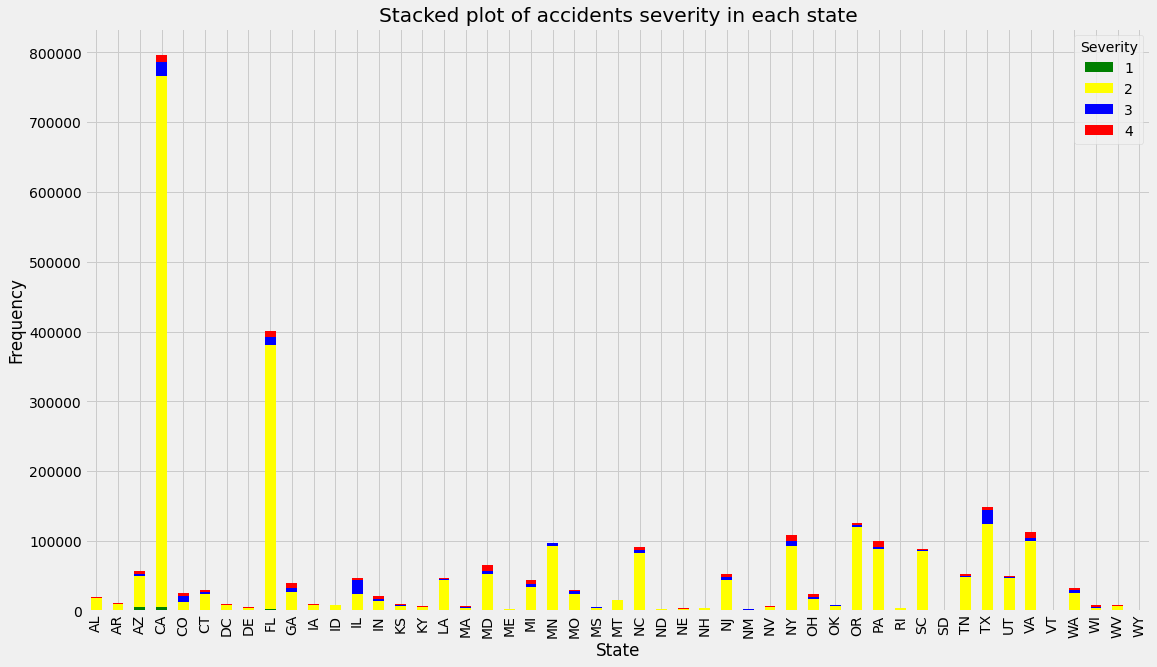

In [47]:
cat_var.plot(kind='bar',stacked=True,figsize=(17,10),color=['green','yellow','blue','red','brown'])
plt.title('Stacked plot of accidents severity in each state')
plt.ylabel('Frequency')
plt.show()

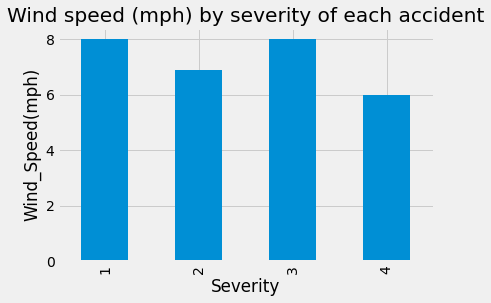

In [48]:
data.groupby('Severity')['Wind_Speed(mph)'].median().plot(kind='bar')
plt.ylabel('Wind_Speed(mph)')
plt.title("Wind speed (mph) by severity of each accident")
plt.show()

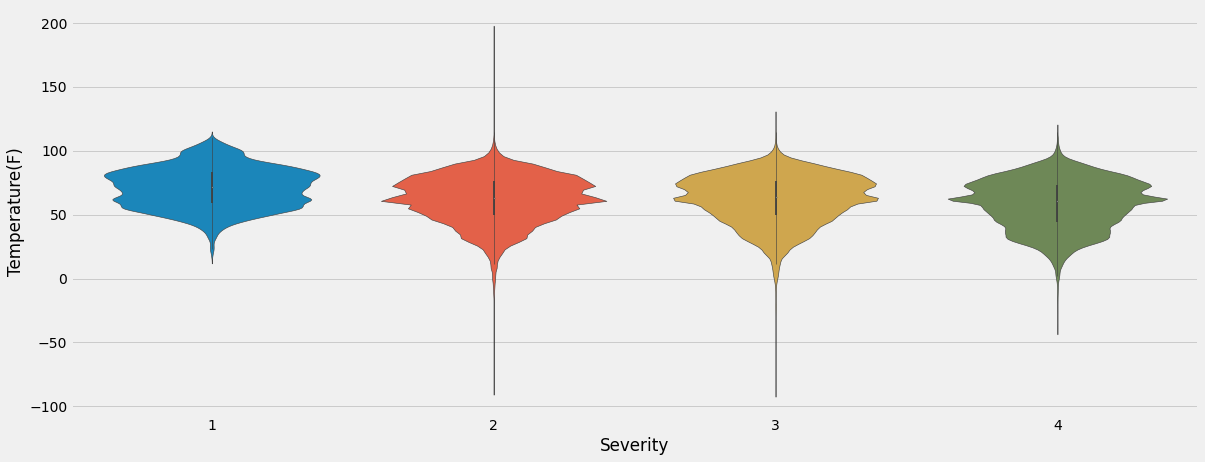

In [49]:
plt.figure(figsize = (18, 7))
sns.violinplot(y="Temperature(F)", x="Severity", data=data,width=0.8,linewidth=0.6)
plt.show()

In [50]:
data.Start_Lat[:4]

0    40.10891
1    39.86542
2    39.10266
3    41.06213
Name: Start_Lat, dtype: float64

In [51]:
data.Start_Lng[:4]

0   -83.09286
1   -84.06280
2   -84.52468
3   -81.53784
Name: Start_Lng, dtype: float64

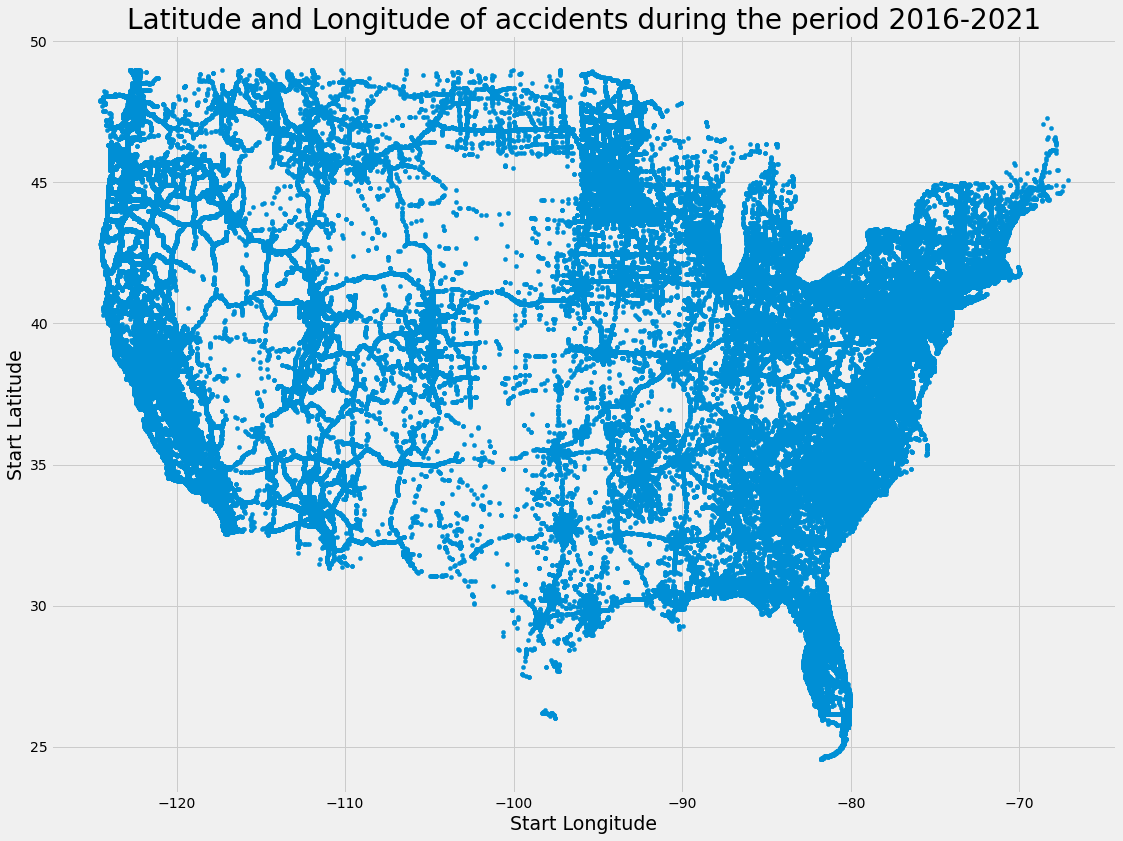

In [52]:
plt.figure(figsize=(17,13))
plt.scatter(x = data.Start_Lng, y = data.Start_Lat, s = 17)
plt.title("Latitude and Longitude of accidents during the period 2016-2021", fontsize = 28)
plt.xlabel("Start Longitude", fontsize = 19)
plt.ylabel("Start Latitude", fontsize = 19)
plt.show()

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go
from nltk.corpus import stopwords

In [8]:
# Metrics dictionary
precision = dict()
recall = dict()
accuracy = dict()
fpr = dict()
tpr = dict()
f1 = dict()

In [9]:
X = data
X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=47)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(2134006, 46) (2134006,)
(711336, 46) (711336,)


In [ ]:
lr = LogisticRegression(random_state=47, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

In [ ]:
y_pred = lr.predict(X_validate)

accuracy["Logistic Regression"] = accuracy_score(y_validate, y_pred)
f1["Logistic Regression"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_validate, y_pred))

In [ ]:
y_pred = lr.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = lr.predict_proba(X_validate)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(20, 13))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

In [ ]:
plt.figure(figsize=(20, 13))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(random_state=47)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

In [ ]:
y_pred = dtc.predict(X_validate)

accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_validate, y_pred))

In [ ]:
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=47)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

In [ ]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_validate, y_pred))

In [ ]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

In [ ]:
plt.figure(figsize=(20, 13))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()